In [1]:
pip install pyopencl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyopencl as cl
import numpy as np
import pandas as pd
import os
from PIL import Image, ImageFilter
from collections import defaultdict

In [3]:
import funciones_filtros as ff
import kernels_filtros_imagenes as kernel
import determinar_mejor_local_size as mejor
import filtros as f
import experimento_filtros as ex

In [ ]:
path='C:/Users/maria/OneDrive'

DataFrames guardados y formateados en Excel en C:/Users/Eevee/Documents/OPENCL TFG IMP/FILTROS IMAGENES/RESULTADOS/MEMORIA\kernels\kernels\resultados.xlsx


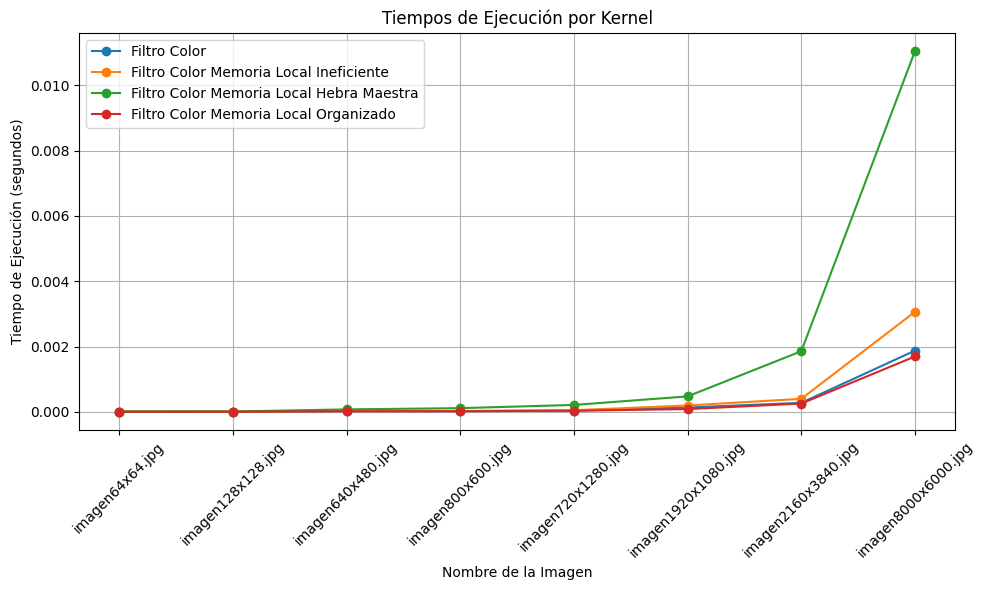

Gráfico guardado en C:/Users/Eevee/Documents/OPENCL TFG IMP/FILTROS IMAGENES/RESULTADOS/MEMORIA\KERNELS_tiempos_ejecucion.png


,kernel_filter_color,kernel_filter_color_local,kernel_filter_color_local2,kernel_filter_color_local3
Image Name,,,,
imagen64x64.jpg,0.000006,0.000007,0.000012,0.000005
imagen128x128.jpg,0.000007,0.000006,0.000013,0.000006
imagen640x480.jpg,0.000026,0.000035,0.000078,0.000018
imagen800x600.jpg,0.000022,0.000031,0.000116,0.000022
imagen720x1280.jpg,0.000040,0.000053,0.000214,0.000037
imagen1920x1080.jpg,0.000135,0.000196,0.000476,0.000087
imagen2160x3840.jpg,0.000279,0.000401,0.001859,0.000256
imagen8000x6000.jpg,0.001878,0.003067,0.011050,0.001699


In [ ]:

# Parámetros de los kernels y funciones
kernels = [
    kernel.kernel_filter_color,
    kernel.kernel_filter_color_local_ineficiente,
    kernel.kernel_filter_color_local_hebra_maestra,
    kernel.kernel_filter_color_local_organizado,
    kernel.kernel_filter_color_local_organizado_junto
]
kernels_names = [
    "kernel_filter_color",
    "kernel_filter_color_local_ineficiente",
    "kernel_filter_color_local_hebra_maestra",
    "kernel_filter_color_local_organizado",
    "kernel_filter_color_local_organizado_junto"
]
funciones = [
    ff.aplicar_filtro_color,
    ff.aplicar_filtro_local,
    ff.aplicar_filtro_local,
    ff.aplicar_filtro_local,
    ff.aplicar_filtro_local
]
filtro = f.filtro_mean
device_type =  cl.device_type.GPU 
local_size = (8,8)  # Cambia esto al tamaño local que desees

# Lista de rutas de las imágenes
lista_paths = [
    os.path.join(path, "OPENCL/FILTROS IMAGENES/IMAGENES/imagen64x64.jpg"),
    os.path.join(path, "OPENCL/FILTROS IMAGENES/IMAGENES/imagen128x128.jpg"),
    os.path.join(path, "OPENCL/FILTROS IMAGENES/IMAGENES/imagen640x480.jpg"),
    os.path.join(path, "OPENCL/FILTROS IMAGENES/IMAGENES/imagen800x600.jpg"),
    os.path.join(path, "OPENCL/FILTROS IMAGENES/IMAGENES/imagen720x1280.jpg"),
    os.path.join(path, "OPENCL/FILTROS IMAGENES/IMAGENES/imagen1920x1080.jpg"),
    os.path.join(path, "OPENCL/FILTROS IMAGENES/IMAGENES/imagen2160x3840.jpg"),
    os.path.join(path, "OPENCL/FILTROS IMAGENES/IMAGENES/imagen8000x6000.jpg")]
# Directorio base para guardar los gráficos
base_save_dir = os.path.join(path, "OPENCL/FILTROS IMAGENES/EXPERIMENTOS/RESULTADOS/COMPARACION_KERNELS/MEM_LOCAL/")

image_names = [path.split('/')[-1] for path in lista_paths]

# Ejecutar el experimento
resultados_finales = ex.experimento_kernels(
    lista_paths,
    filtro,
    kernels,
    kernels_names,
    funciones,
    device_type,
    local_size,
    base_save_dir
)

ex.guardar_dataframes_excel(resultados_finales, resultados_finales, base_save_dir, "filtro_color", "experimento_kernels")



